# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Group Members
- Thao Hoang (A13583188)
- Him Li (A14754959)
- Paul Zhu ()
- Rishabh Singhal()
- Jiaxin Ge (A13409166)
- Talal AlQadi (A13816618)


# Research Question

*Fill in your research question here*

## Background and Introduction

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Gathering, Wrangling, and Cleaning

Our first step is gathering the data, by taking out the data we require. We initialize a parameters list to adjust filtration based on terms set in the list. We do this to gather all capes submission with cogs using the ClassExtractor function. Which just queries the rows of data out based on the set list, waiting to be transposed by the transpose function.
The next step is to change the dataset, to be more accessible for analysis and to be visually pleasing.

In [141]:
# Setup
import pandas as pd
import numpy as np
import math


# Visualizations
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns


First, we look at the initial data. However, we realized that each cape_ID question is given its own row, making the data repetetive and clunky.

In [150]:
df_cogs = pd.read_csv('CAPES.csv')
df_cogs.head(10)

,LOCATION,ROOM,QUARTER_INDEX,QUARTER,QUARTER_2,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,CAPE_ID,QUESTION,SECTION_SIZE,RESPONSE_SIZE,RATING
0,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,5,Instructor displays a proficient command of th...,26,20,4.90
1,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,6,Instructor is well prepared for classes.,26,20,4.75
2,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,7,Instructor's speech is clear and audible.,26,20,4.85
3,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,8,Instructor explains the [coursetype] material ...,26,20,4.70
4,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,9,Lectures hold your attention.,26,20,4.50
5,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,10,Instructor’s lecture style facilitates note-ta...,26,20,4.20
6,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,11,Instructor shows concern for students' learning.,26,20,4.45
7,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,12,Instructor promotes appropriate questions/disc...,26,20,4.15
8,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,13,Instructor is accessible outside of class.,26,20,4.00
9,CENTR,222,9,FA12,FA12,ANAR,153,767325,Braswell,Geoffrey E.,14,Instructor starts and finishes class on time.,26,20,4.55


In [142]:
#Parameter Lists
#Set the variable as None to ignore it when searching
#Change the value here and run all the cells to get an output
LOCATION = None
ROOM = None
QUARTER_INDEX = None          # A number, refer to the file or dataframe
QUARTER = None                # e.g. "FA13"/"WI19"/"SP15"
COURSE_ID = "COGS"             # e.g. "COGS", "BILD"
COURSE_NUM = ["1","3","9","11","14A","14B","17","100"]  # Must be a list of string (double quoted or single quoted)! e.g. ["100", "20A", "120A"]
SECTION = None               # Must be a string! e.g "767325"
INSTRUCTOR_FIRST = None    # instructor's first name
INSTRUCTOR_LAST = None     # instructor's last name
LOWEST_SIZE = None            # Include only sections that have student number >= this variable
LOWEST_RESPONSE = None        # Include only Capes Questions that have number of response >= this variable
CAPES = [5,6,7,8,9,10,17,27,26]        # Must be a list of integer! Include only Capes question with an ID that is in the list. From 5 to 27, plus 51
FILENAME = "COGS_CAPES.csv"    # name of output file

In [143]:
# Read CSV
dtypes = {'LOCATION':str, 'ROOM':str, 'QUARTER_INDEX':int, 'QUATER':int, 'COURSE_ID':str, 'COURSE_NUM':str, 
          'SECTION':str, 'INSTRUCTOR_LAST':str, 'INSTRUCTOR_FIRST': str, 'CAPE_ID':int, 'QUESTION':str, 
          'SECTION_SIZE':int, 'RESPONSE_SIZE':int, "RATING":float}
df = pd.read_csv("CAPES.csv", usecols = ["LOCATION", "ROOM", "QUARTER_INDEX", "QUARTER", 
                                         "COURSE_ID", "COURSE_NUM", "SECTION", "INSTRUCTOR_LAST", 
                                         "INSTRUCTOR_FIRST", "CAPE_ID", "QUESTION", 
                                         "SECTION_SIZE", "RESPONSE_SIZE", "RATING"],
                 dtype = dtypes)

# clean out empty spaces in cells
df["INSTRUCTOR_FIRST"] = df["INSTRUCTOR_FIRST"].str.strip()
df["INSTRUCTOR_LAST"] = df["INSTRUCTOR_LAST"].str.strip()

def ClassExtractor(LOCATION, ROOM, QUARTER, COURSE_ID, COURSE_NUM, SECTION, INSTRUCTOR_LAST, 
                   INSTRUCTOR_FIRST, LOWEST_SIZE, LOWEST_RESPONSE, CAPES):
    result = df
    
    if LOCATION is not None:
        result = result[result["LOCATION"] == LOCATION]
    
    if ROOM is not None:
        reulst = result[result["ROOM"] == ROOM]
        
    if QUARTER is not None:
        result = result[result["QUATER"] == QUARTER]
    
    if COURSE_ID is not None:
        result = result[result["COURSE_ID"] == COURSE_ID]
        
    if COURSE_NUM is not None:
        result = result[result["COURSE_NUM"].isin(COURSE_NUM)]
        
    if SECTION is not None:
        result = result[result["SECTION"] == SECTION]
    
    if INSTRUCTOR_LAST is not None:
        result = result[result["INSTRUCTOR_LAST"] == INSTRUCTOR_LAST]
        
    if INSTRUCTOR_FIRST is not None:
        result = result[result["INSTRUCTOR_FIRST"] == INSTRUCTOR_FIRST]
        
    if LOWEST_SIZE is not None:
        result = result[result["SECTION_SIZE"] >= LOWEST_SIZE]
        
    if LOWEST_RESPONSE is not None:
        result = result[result["RESPONSE_SIZE"] >= LOWEST_RESPONSE]
        
    if isinstance(CAPES, list):
        result = result[result["CAPE_ID"].isin(CAPES)]
    
    
    return result

def AlltimeAvg(INSTRUCTOR_FIRST, INSTRUCTOR_LAST, CAPES):
    newdf = (df.loc[df["INSTRUCTOR_LAST"] == INSTRUCTOR_LAST]).loc[df["INSTRUCTOR_FIRST"] == INSTRUCTOR_FIRST]
    dic = {}

    for i in CAPES:
        temp = newdf.loc[newdf["CAPE_ID"] == i]
        dic[i] = temp["RATING"].mean()

    print("All Time Average Rating for", INSTRUCTOR_LAST + ",", INSTRUCTOR_FIRST, "in (CAPE_ID, AVG)")
    for key, value in dic.items():
        print(key, value)


After extracting the data we require, we now must convert the dataset into a nicely formatted dataframe with with each section having its own average ratings. The initial dataset contains about 21 rows per CAPES submission, but after some filtration, we leveled it down to 9 questions that we are interested in through the parameters list. Still, this means 9 rows for each Capes submission. With the following functions, each rating is converted into a column. Furthermore, each CAPES_ID question is renamed in reference to what the question is asking.

In [144]:
# This cell essentially transposes the ratings into column values
# to get rid of duplicate values
aggregations = {
    'RATING':'mean',
    'SECTION_SIZE':'sum',
    'RESPONSE_SIZE':'sum'
}
def transpose(output):
    hall = output
    data = hall.groupby(['CAPE_ID','SECTION']).agg(aggregations).reset_index()

    know_rating = pd.Series(data[data.CAPE_ID == 5].RATING)
    prep_rating = pd.Series(data[data.CAPE_ID == 6].RATING)
    audible_rating = pd.Series(data[data.CAPE_ID == 7].RATING)
    expl_rating = pd.Series(data[data.CAPE_ID == 8].RATING)
    attent_rating = pd.Series(data[data.CAPE_ID == 9].RATING)
    note_rating = pd.Series(data[data.CAPE_ID == 10].RATING)
    stimu_rating = pd.Series(data[data.CAPE_ID == 17].RATING)
    rec_course_rating = pd.Series(data[data.CAPE_ID == 26].RATING)
    rec_professor_rating = pd.Series(data[data.CAPE_ID == 27].RATING)
    df = hall
    df = df.drop_duplicates(subset=['SECTION'], keep='first')

    df.loc[:,'know_rating'] = list(know_rating.values)
    df.loc[:,'prep_rating'] = prep_rating.values
    df.loc[:,'audible_rating'] = audible_rating.values
    df.loc[:,'expl_rating'] = expl_rating.values
    df.loc[:,'attent_rating'] = attent_rating.values
    df.loc[:,'note_rating'] = note_rating.values
    df.loc[:,'stimu_rating'] = stimu_rating.values
    df.loc[:,'rec_course_rating'] = rec_course_rating.values
    df.loc[:,'rec_professor_rating'] = rec_professor_rating.values
    df = df.drop(columns=['QUESTION','CAPE_ID'])

    
    return df

In [145]:
# Calling Function and Write Data
original = ClassExtractor(LOCATION, ROOM, QUARTER, COURSE_ID, COURSE_NUM, SECTION, INSTRUCTOR_LAST, 
                   INSTRUCTOR_FIRST, LOWEST_SIZE, LOWEST_RESPONSE, CAPES)
output = transpose(original)
filename = "CAPE_" + (INSTRUCTOR_FIRST or "" or COURSE_ID) + " " + (INSTRUCTOR_LAST or "") + ".csv"

if not output.empty:
    output.to_csv(FILENAME or ("CAPE_" + (INSTRUCTOR_FIRST or "" or COURSE_ID) + " " + (INSTRUCTOR_LAST or "") + ".csv"))


In [152]:
df_cogs = pd.read_csv("COGS_CAPES.csv")
df_cogs.head(5)

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,...,RATING,know_rating,prep_rating,audible_rating,expl_rating,attent_rating,note_rating,stimu_rating,rec_course_rating,rec_professor_rating
0,6005,PETER,110,9,FA12,COGS,1,751912,Creel,Sarah,...,4.263158,4.391111,4.277778,4.496296,3.889630,3.715556,3.719259,3.838519,0.829630,0.869630
1,6530,CENTR,115,9,FA12,COGS,11,751622,Boyle,Mary E. T.,...,4.741935,4.714574,4.719534,4.571525,4.392761,4.282002,3.491519,4.624776,0.921627,0.937500
2,6684,SOLIS,104,9,FA12,COGS,17,751631,Johnson,Christine M.,...,4.682927,4.647019,4.542683,4.490515,4.466125,3.803523,3.907353,4.504065,0.923442,0.920054
3,6747,CENTR,115,9,FA12,COGS,3,751615,Boyle,Mary E. T.,...,4.333333,4.151964,4.143793,4.293289,4.156604,3.785060,3.964009,4.294407,0.892550,0.943732
4,40567,PCYNH,121,11,FA13,COGS,1,783453,Boyle,Mary E. T.,...,4.250000,3.956792,3.952378,3.976577,3.720754,3.494954,3.653218,4.007390,0.835799,0.884138


Perfect! Now we have the dataset in order, with each capes submission on its own row. Furthermore ratings values are set, but still need more cleaning. For the cleaning, we will drop NA values, and the unnamed column. Furthermore, we are setting the rating column to be the average of all the other ratings. 

In [153]:
#Setting the dataframe, and cleaning it up
df_cogs = df_cogs.dropna()
df_cogs = df_cogs.drop(columns='Unnamed: 0')
df_cogs.RATING = df_cogs[['know_rating','prep_rating','audible_rating',
                          'expl_rating','attent_rating','note_rating',
                          'stimu_rating']].mean(axis=1)

# Data Analysis & Visualization

We start out by first looking at the data and what it has to offer

First, we start by looking at the classrooms involved in the dataset. We see that there are a lot of entries for CSB, PCYNH, CENTR, and very little for CICC and Sequo. Meaning, that data may be skewed for those locations.

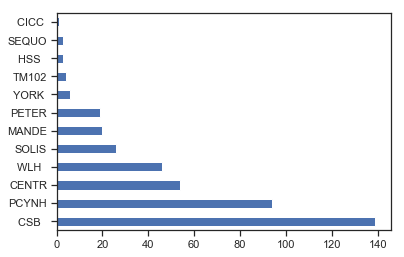

In [154]:
# Counts for each classroom
df_cogs['LOCATION'].value_counts().plot(kind='barh')

f1 = plt.gcf()

Now that we know which locations are most used in the cog sci department for the chosen classes, we can move on to see the correlations of the variables in comparison to each other.
From the heatmap below, we can see that the correlations are reasonable. For example, recommendation of professor rating is most positvely correlated with the explanation rating. Preparation rating is most correlated with explanation rating too, and knowledge rating. Audible rating isn't extremely correlated with other ratings, suggesting it may be primarly effected by the classroom itself.

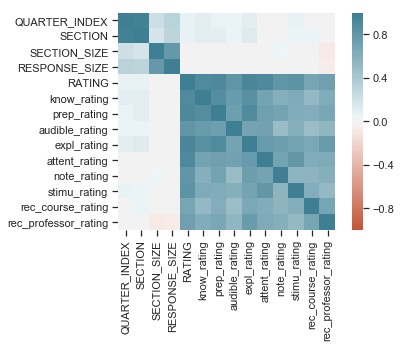

In [136]:
## YOUR CODE HERE
sns.set(style="ticks")
corr = df_cogs.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

To continue our exploration of the ratings, we want to see if there is a link between location and ratings.  We setup a for loop to calculate the all the average ratings for each location, and save the entries in their respective variables.

In [155]:
classes = df_cogs.LOCATION.unique()
average_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
prep_ratings = np.zeros(len(classes))
audible_ratings = np.zeros(len(classes))
expl_ratings = np.zeros(len(classes))
rec_professor_ratings = np.zeros(len(classes))
rec_course_ratings = np.zeros(len(classes))
stimu_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
for i in range(len(classes)):
    average_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].RATING.mean()
    note_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].note_rating.mean()
    prep_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].prep_rating.mean()
    audible_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].audible_rating.mean()
    expl_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].expl_rating.mean()
    rec_professor_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].rec_professor_rating.mean()
    rec_course_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].rec_course_rating.mean()
    stimu_ratings[i] = df_cogs[df_cogs.LOCATION == classes[i]].stimu_rating.mean()
    if np.isnan(average_ratings[i]) :
        average_ratings = average_ratings[:i]
        note_ratings = note_ratings[:i]
        prep_ratings = prep_ratings[:i]
        audible_ratings = audible_ratings[:i]
        expl_ratings = expl_ratings[:i]
        rec_professor_ratings = rec_professor_ratings[:i]
        rec_course_ratings = rec_course_rating[:i]
        stimu_ratings = stimu_rating[:i]
        classes[i]

In [156]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff',
            10 : '#45B39D',
            11 : '#9B59B6',
            12 : '#A9DFBF',
            13 : '#D4AC0D'
           }

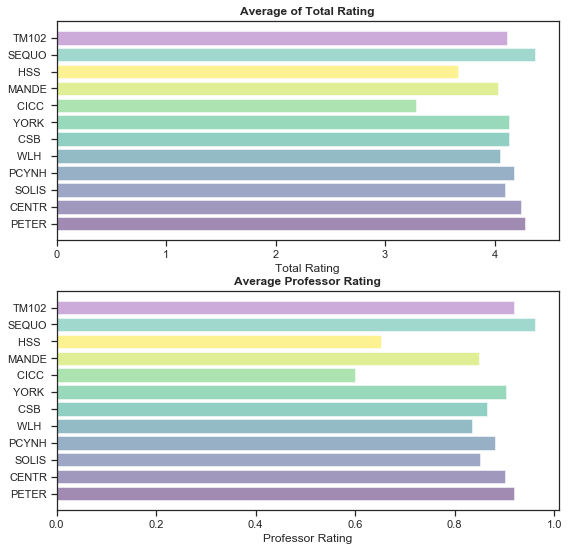

In [157]:
color1 = [COLOR_MAP[l] for l in range(len(classes))]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
# Average Total Rating of each Location
ax[0].barh(classes, average_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Total Rating')
ax[0].set_title('Average of Total Rating',fontweight='bold')
# Average Professor Rating of each Location
ax[1].barh(classes, rec_professor_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Professor Rating')
ax[1].set_title('Average Professor Rating',fontweight='bold')

plt.show()

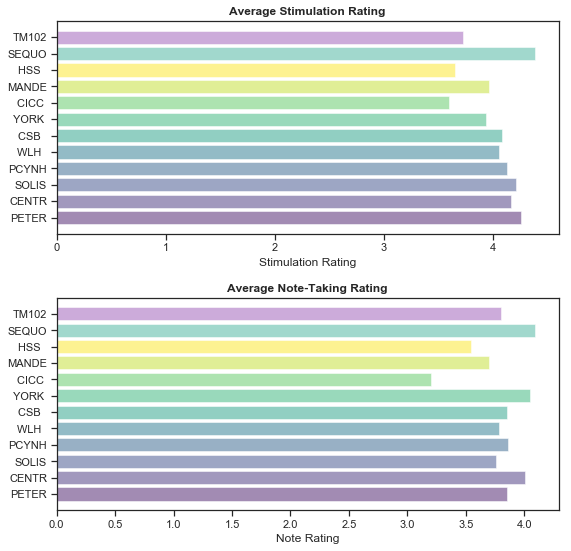

In [158]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.3, wspace=0.70)
# Average Stimulation Rating
ax[0].barh(classes, stimu_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Stimulation Rating')
ax[0].set_title('Average Stimulation Rating',fontweight='bold')
# Average Note Ratings of each Location
ax[1].barh(classes, note_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Note Rating')
ax[1].set_title('Average Note-Taking Rating',fontweight='bold')
plt.show()

From the visualizations above, we can see the 4 different average ratings for each location. Sequo matches the highest in almost all 4 rankings, however, there are very little entries which could skew the data. In locations, with more entries, such as CSB, Peter, Center, and PCYNH visualizations like the above allow us to see what most of these locations lack in. 
All around, the note-taking rating is low for all the locations, with exceptions to Center hall. CSB fairs the highest note-taking rating, but Peterson has a higher average total rating. On the other hand, Peterson has a very low note rating, could be due to the limited projectors and age of the rooms. 

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*